<img src="images/mem.jpg" align="center" style="height: 400px;"/>

# Занятие №3

## План на сегодня

1. Вспомнить все: что мы уже знаем (должны знать) о нейронных сетях: нейрон и его обучение, функции активации (и зачем они нужны) и функции ошибки, градиентный спуск (три вида).
2. Метрики качества и функции потерь для задач регрессии и классификации. Accuracy, precision и recall.
3. Обучение полносвязных нейронных сетей, метод обратного распространения ошибки.
4. Проблемы нейронных сетей: затухание и взрыв градиентов.
5. Методы улучшения качества работы нейронной сети: аугментация, ранний останов, dropout и dropconnect, batch нормализация, использование готовых архитектур (transfer learning).
6. Способы валидации модели: hold out, KFold.
7. Работа с изображениями: задачи детекции, сегментации, классификации. Сверточные нейронные сети.

## 1. Вспомнить все

<img src="images/1st.jpg" align="center" style="height: 300px;"/>

**Искуственный нейрон**
<img src="images/slide-2.jpg" align="center" style="height: 600px;"/>

**Градиентный спуск**
Идея обычного градиентного спуска: 

$X_1 = random$

$X_2 = g(X_1) - \alpha \cdot \textbf{grad} \hspace{3px} g(X_1)$

$X_3 = g(X_2) - \alpha \cdot \textbf{grad} \hspace{3px} g(X_2)$

$\cdots$

**Пример**

$g(x, y) = 3x^2 + xy + 2y^2 - x - 4y$

$\textbf{grad} \hspace{3px} g(x, y) = \begin{pmatrix}
  6x + y - 1 \\
  x + 4y -4
\end{pmatrix} \Rightarrow
\textbf{grad} \hspace{3px} g(1, 1) = \begin{pmatrix}
  6 \\
  1
\end{pmatrix}$

In [6]:
import numpy as np

In [7]:
def g(x, y):
    return 3 * x**2 + x * y + 2 * y ** 2 - x - 4 * y

def grad_g(x_0, y_0, d = 0.0001):
    ans = []
    ans.append((g(x_0 + d , y_0) - g(x_0 , y_0)) / d)
    ans.append((g(x_0 , y_0 + d) - g(x_0 , y_0)) / d)
    return np.array(ans)

print(grad_g(1, 1))

[6.0003 1.0002]


In [8]:
lr = 0.01 # Шаг обучения (learning rate)

X_1 = np.random.random(2) * 10
print(X_1)

[0.26267584 6.22308249]


In [9]:
for i in range(1000):
    X_2 = X_1 - lr * grad_g(X_1[0], X_1[1])
    X_1 = X_2 - lr * grad_g(X_2[0], X_2[1])

print(X_1, X_2)

[-4.34782609e-05  9.99960870e-01] [-4.34782609e-05  9.99960870e-01]


In [10]:
g(X_1[0], X_1[1])

-1.9999999895652174

Аналитически полученный результат: $g_{min} = g(0, 1) = -2$

Градиентный спуск позволяет найти только локальные минимумы!

<img src="images/sgd.jpg" align="center" style="height: 400px;"/>

**Виды градиентного спуска:**
1. Обычный
2. Стахостический
3. Побатчевый

## 2. Функции потерь

<img src="images/table.jpg" align="center" style="height: 400px;"/>

### Функции активации:

**Sigmoida:**

$$
    \sigma(x) = \frac{1}{1+e^{-x}}
$$

**Tanh:**

$$
    \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

**ReLU:**

$$
    ReLU(x) = \max(0, x)
$$

**Softmax:**

$$
    Softmax(\vec{x})_i = \frac{e^{x_i}}{\sum \limits_{k=1}^n e^{x_k}}
$$

#### Вопрос: Зачем нужны функции активации?

#### Ответ: иначе нет смысла в большом количестве нейронов (глубокая сеть будет эквивалентна однослойной)

### Функции потерь:

**MSE:**
$$
    L = \frac{1}{N}\sum_{k = 1}^N (\hat{y}_k - y_k)^2
$$

$\hat{y}$ - предсказанное значение

$y$ - правильный ответ

**Binary crossentropy:**

$$
    L = -(t \log y + (1-t) \log(1-y))
$$

$y$ - предсказанная вероятность принаделжности к 1ому классу

$t$ - целевое значение вероятности принаделжности к 1ому классу (0 или 1)

**Categorical crossentropy:**

$$
    L = - \sum_{k=1}^{n} t_k \log(y_k)
$$

$y_k$ - предсказанная вероятность принаделжности к k-му классу

$t$ - целевое значение вероятности принаделжности к k-му классу (0 или 1)

### Метрики качества классификации

<img src="images/TP.jpg" align="center" style="height: 300px;"/>


**Accuracy:**
$$
    Accuracy = \frac{TP+TN}{TP+TN+FP+FN}
$$

<img src="images/for.jpg" align="center" style="height: 400px;"/>


**Precision:**
$$
    Precision = \frac{TP}{TP+FP}
$$


**Recall:**
$$
    Recall = \frac{TP}{TP+FN}
$$

## 3. Обратное распространение ошибки

<img src="images/back.jpg" align="center" style="height: 400px;"/>

Основано на производной сложной функции (chain rule)

## 4. Затухание градиента

Производная сигмойды:

$$
\sigma'(x) = \sigma(x)(1 - \sigma(x)) \leq 0.25
$$


Производная гиперболического тангенса:

$$
\tanh'(x) = 1 - \tanh^2(x) \leq 1
$$

Производные этих функций достигают своих наибольших значений в окрестности нуля, а при больших по модулю значениях аргумента стремятся к нулю.

## 5. Методы улучшения качества работы нейронной сети

**Аугментация**

Аугментация - подход к созданию обучающих данных, их искусственная генерация. Можно взять несколько шаблонов / «идеальных» примеров (например, наборов шрифтов) и с помощью различных искажений создать необходимое число примеров для обучения. Можно использовать следующие искажения:

1. Сдвиги
2. Повороты
3. Дополнительные линии на изображениях
4. Блики
5. Дефокус
6. Сжатия и растяжения вдоль осей
7. Замена фона


Аугментацию надо использовать с умом: отдельные ее виды неприменимы в некоторых задачах!

<img src="images/example.jpg" align="center" style="height: 400px;"/>

<img src="images/res.jpg" align="center" style="height: 400px;"/>

**Dropout и Dropconnect**

Очень популярный метод регуляризации, основанный на случайном отключении нейронов или связей во время обучения сети.

<img src="images/DropConnect.png" align="center" style="height: 400px;"/>

<img src="images/DropOut2.png" align="center" style="height: 400px;"/>

**Нормалзация**

<img src="images/norm.png" align="center" style="height: 400px;"/>

Батч нормализация:
$$
    \mu_{\mathcal{B}}={1\over m}\sum_{i=1}^mx_i, \hspace{5pt} \sigma^2_{\mathcal{B}}={1\over m}\sum_{i=1}^m(x_i - \mu_{\mathcal{B}})^2
$$ 


$$
    \hat{x_i} = {x_i-\mu_{\mathcal{B}}\over\sqrt{\sigma_{\mathcal{B}}^2+\epsilon}}
$$

## 6. Способы валидации модели

**Hold out**

Разделение выборки на тестовую, валидационную и обучающую:

- На обучающей выборке проходит трнировка модели
- С помощью валидационной подбирают гиперпараметры сети
- На тестовой проверяют уже полностью обученную сеть

**Кросс валидация:**
    
<img src="images/4.png" align="center" style="height: 400px;"/>

Как вы думаете, где нельзя использовать такой метод валидации?

## 7. CNN

**Почему FC сети плохи для работы с фотографиями:**

- Размеры фотографий достаточно большие (1024x1024)
- Нужно много параметров, долгое обучение и медленная работа
- Не использует всю информацию о фотографии (при вытягивании в вектор)
- Не инвариантно относительно положения объекта на фотографии
- Сложно обучать, нужен очень большой dataset, склонность к переобучению

**Задачи при работе с изображениями:**

- Сегментация
<img src="images/seg.png" align="center" style="height: 400px;"/>

- Детекция
<img src="images/detect.png" align="center" style="height: 400px;"/>

- Классификация
<img src="images/signs.jpg" align="center" style="height: 400px;"/>

**Идея:** "ходить" по изображению маленьким окном, выделяя признаки, которые потом передать в полносвязную сеть.

## 8. Transfer learning

**EfficientNet Example with PyTorch**

In [11]:
# Get EfficientNet PyTorch
!pip install efficientnet_pytorch

In [12]:
import json
import urllib
from PIL import Image
import time
import torch
from torchvision import transforms
from efficientnet_pytorch import EfficientNet
from urllib.request import urlopen

In [13]:
model_name = 'efficientnet-b0'
image_size = EfficientNet.get_image_size(model_name) # 224

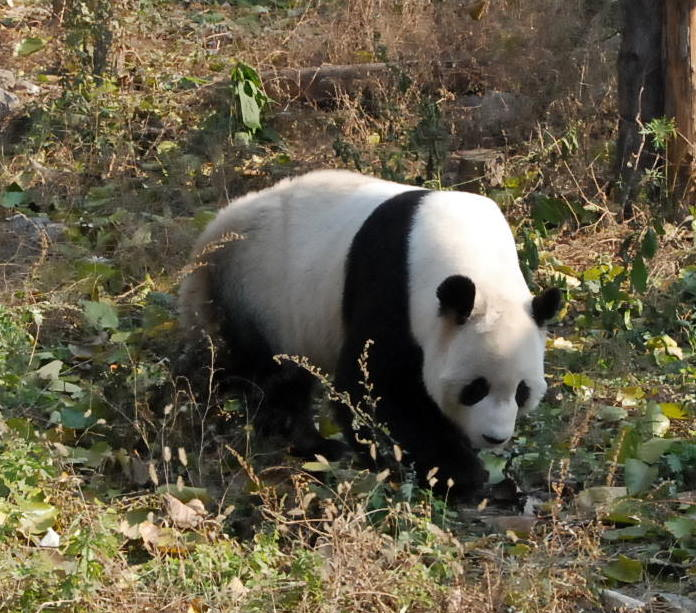

In [15]:
image_url = "https://raw.githubusercontent.com/lukemelas/EfficientNet-PyTorch/master/examples/simple/img.jpg"
data_url = "https://raw.githubusercontent.com/lukemelas/EfficientNet-PyTorch/master/examples/simple/labels_map.txt"

image = Image.open(urlopen(image_url))
image

In [16]:
# Preprocess image
tfms = transforms.Compose([transforms.Resize(image_size), transforms.CenterCrop(image_size), 
                           transforms.ToTensor(),
                           transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),])
image = tfms(image).unsqueeze(0)
print(image.shape)
image

torch.Size([1, 3, 224, 224])


tensor([[[[ 0.0398, -0.1657, -0.0287,  ..., -1.3473, -1.3815, -1.4672],
          [ 0.2967, -0.0458, -0.0116,  ..., -1.3302, -1.3815, -1.5185],
          [ 0.3652,  0.4679,  0.5193,  ..., -1.3644, -1.4158, -1.4672],
          ...,
          [ 1.2557,  0.5364,  0.0398,  ..., -0.2513, -0.1828, -0.4739],
          [ 0.2453, -0.5596, -0.5424,  ..., -0.5082, -0.3027, -0.4911],
          [-0.0629, -0.5938, -0.5596,  ..., -1.2103, -0.5767, -0.6281]],

         [[-0.0399, -0.2325, -0.1099,  ..., -1.2829, -1.3179, -1.4055],
          [ 0.1176, -0.2150, -0.1800,  ..., -1.2654, -1.3179, -1.4580],
          [ 0.1176,  0.2052,  0.2752,  ..., -1.2829, -1.3529, -1.4055],
          ...,
          [ 1.1681,  0.4678, -0.0224,  ..., -0.3375, -0.2675, -0.5651],
          [ 0.2052, -0.5301, -0.4601,  ..., -0.5826, -0.3550, -0.5651],
          [ 0.0476, -0.3375, -0.2850,  ..., -1.2654, -0.5826, -0.6527]],

         [[-0.4450, -0.6018, -0.4450,  ..., -1.0376, -1.0724, -1.1596],
          [-0.2184, -0.4973, -

In [17]:
# Load class names
labels_map = json.load(urlopen(data_url))
labels_map = [labels_map[str(i)] for i in range(1000)]

print("Num classes:", len(labels_map))
labels_map[:5]

Num classes: 1000


['tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri',
 'hammerhead, hammerhead shark']

In [18]:
# Classify with EfficientNet

model = EfficientNet.from_pretrained(model_name)
model.eval()

start = time.time()
with torch.no_grad():
    logits = model(image)
preds = torch.topk(logits, k=5).indices.squeeze(0).tolist()
print("testing time: ", time.time() - start, " seconds")

print('-----')
for idx in preds:
    label = labels_map[idx]
    prob = torch.softmax(logits, dim=1)[0, idx].item()
    print('{:<75} ({:.2f}%)'.format(label, prob*100))

Loaded pretrained weights for efficientnet-b0
testing time:  0.9746503829956055  seconds
-----
giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca           (83.49%)
brown bear, bruin, Ursus arctos                                             (0.62%)
lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens         (0.60%)
ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus                 (0.44%)
Arctic fox, white fox, Alopex lagopus                                       (0.34%)


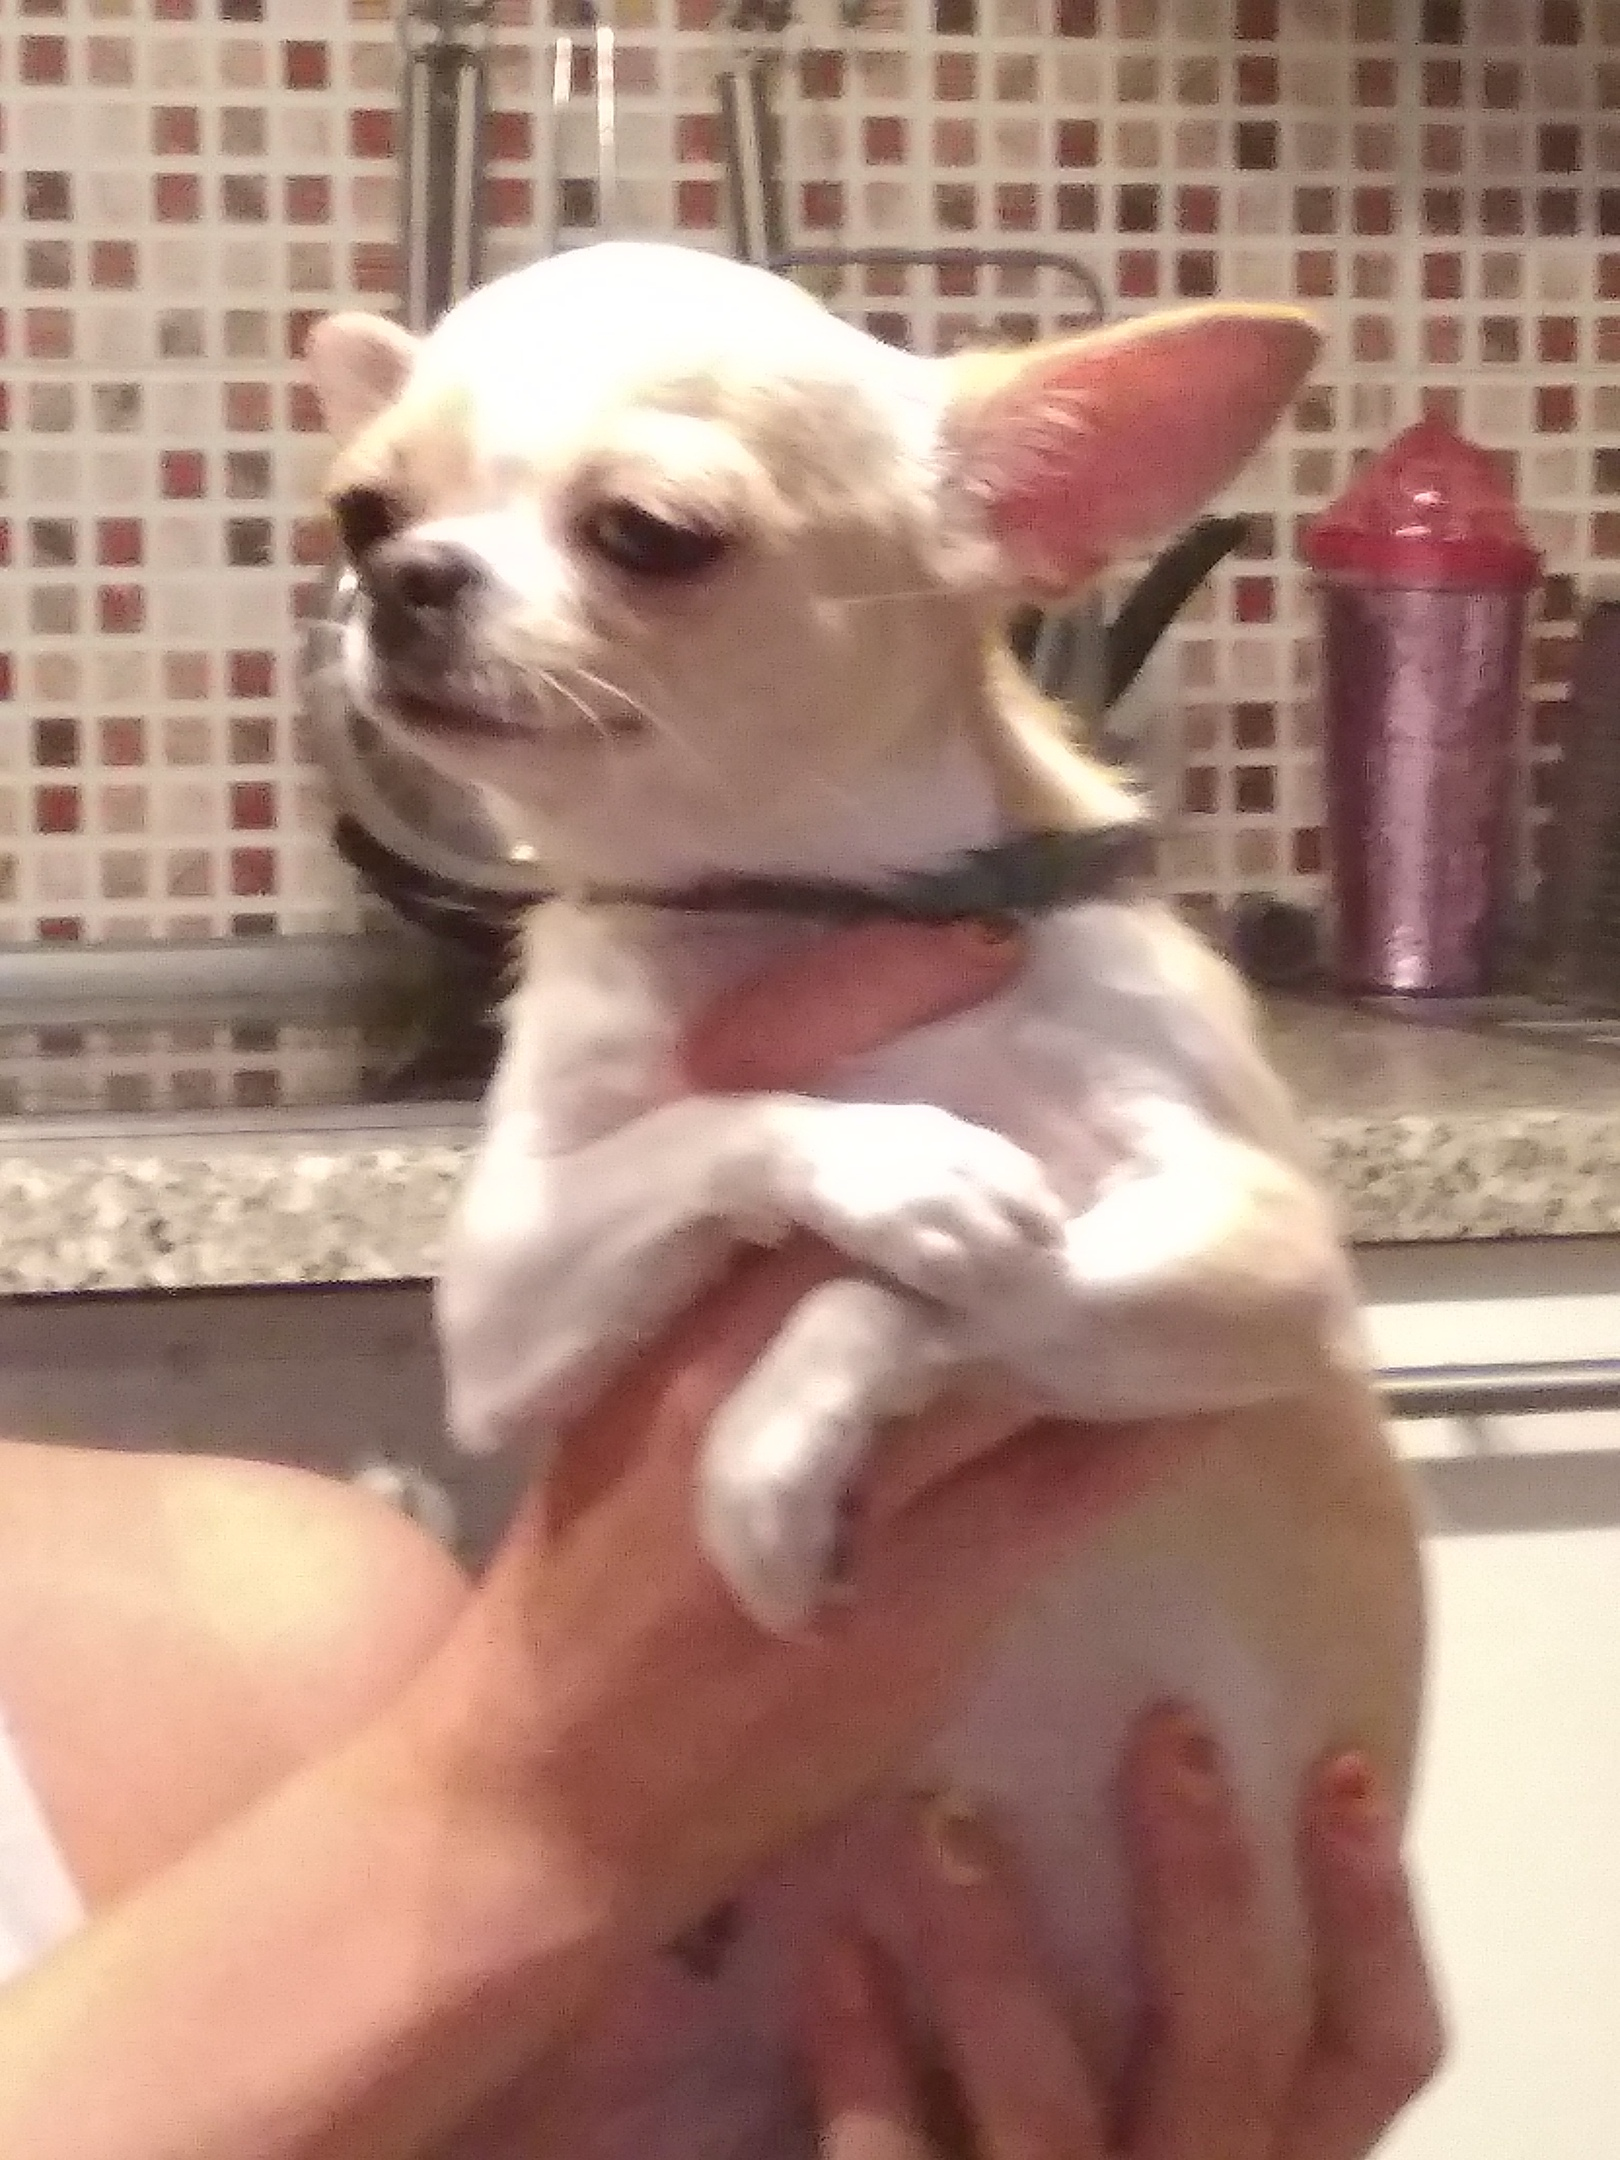

In [19]:
# Попробуем собственый пример
new_photo = "images/dog.jpg"

image = Image.open(new_photo)
image

In [20]:
tfms = transforms.Compose([transforms.Resize(image_size), transforms.CenterCrop(image_size), 
                           transforms.ToTensor(),
                           transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),])
image = tfms(image).unsqueeze(0)
print(image.shape)
image

torch.Size([1, 3, 224, 224])


tensor([[[[ 1.3584,  1.4612,  1.3755,  ...,  0.1254, -0.1314, -0.1657],
          [ 1.3927,  1.4954,  1.4098,  ...,  0.2111, -0.0801, -0.1486],
          [ 1.4783,  1.5468,  1.4954,  ...,  0.1597, -0.0972, -0.1486],
          ...,
          [ 2.1290,  2.1633,  2.1633,  ...,  2.1633,  2.1633,  2.1633],
          [ 2.0948,  2.1119,  2.1462,  ...,  2.1633,  2.1633,  2.1462],
          [ 2.0605,  2.0605,  2.1119,  ...,  2.1462,  2.1462,  2.1462]],

         [[ 1.1506,  1.2906,  1.2031,  ..., -0.3725, -0.6702, -0.7577],
          [ 1.1681,  1.2906,  1.2206,  ..., -0.3025, -0.6527, -0.7577],
          [ 1.2556,  1.3431,  1.2906,  ..., -0.3375, -0.6702, -0.7752],
          ...,
          [ 2.0084,  2.0259,  2.0084,  ...,  2.1485,  2.1485,  2.1485],
          [ 1.9559,  1.9734,  1.9909,  ...,  2.1485,  2.1485,  2.1310],
          [ 1.9209,  1.9209,  1.9559,  ...,  2.1310,  2.1310,  2.1310]],

         [[ 1.0714,  1.2108,  1.1237,  ..., -0.4450, -0.7238, -0.8110],
          [ 1.0888,  1.2108,  

In [21]:
start = time.time()
with torch.no_grad():
    logits = model(image)
preds = torch.topk(logits, k=5).indices.squeeze(0).tolist()
print("testing time: ", time.time() - start, " seconds")

print('-----')
for idx in preds:
    label = labels_map[idx]
    prob = torch.softmax(logits, dim=1)[0, idx].item()
    print('{:<75} ({:.2f}%)'.format(label, prob*100))

testing time:  0.7018728256225586  seconds
-----
Chihuahua                                                                   (57.36%)
French bulldog                                                              (13.72%)
Mexican hairless                                                            (3.34%)
basenji                                                                     (3.18%)
Ibizan hound, Ibizan Podenco                                                (1.62%)


## Используем знания на практике!

In [22]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import densenet
from keras.models import Sequential, Model, load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from keras import regularizers
from keras import backend as K
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
from tensorflow.keras.models import load_model  
from tensorflow.keras.callbacks import ModelCheckpoint
from  keras.utils import np_utils
from keras.layers import Dense, Dropout, Activation, Flatten, MaxPool2D
from keras.layers import Conv2D, BatchNormalization

from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [36]:
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

num_train = X_train.shape[0]
num_test = X_test.shape[0]

print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


([], <a list of 0 Text yticklabel objects>)

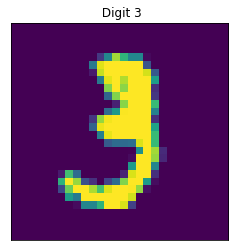

In [24]:
plt.imshow(X_train[10] )
plt.title(" Digit " + str(y_train[10]) )
plt.xticks([])
plt.yticks([])

In [25]:
# Нормализуем данные (значения яркости всех пикселей от 0 до 1)

# Normalizing the input
X_train= X_train.reshape(X_train.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_train /= 255

X_test = X_test.reshape(X_test.shape[0],28,28,1)
X_test = X_test.astype('float32')
X_test /= 255

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [26]:
y_train[10]

3

In [27]:
# Переведем метки классов в формат OneHotEncoder

y_train = np_utils.to_categorical(y_train)
y_test= np_utils.to_categorical(y_test)

print(y_train[10])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [28]:
classifier = Sequential()

classifier.add(Conv2D(32, (3,3), input_shape = (28, 28, 1)))
BatchNormalization(axis = -1) #Axis -1 is always the features axis
classifier.add(Activation('relu'))

classifier.add(Conv2D(32, (3,3)))
BatchNormalization(axis = -1)
classifier.add(Activation('relu'))
classifier.add(MaxPool2D(pool_size = (2,2)))
BatchNormalization(axis = -1)

classifier.add(Conv2D(64, (3,3)))
BatchNormalization(axis = -1)
classifier.add(Activation('relu'))

classifier.add(Conv2D(64, (3,3)))
classifier.add(Activation('relu'))
classifier.add(MaxPool2D(pool_size = (2,2)))

classifier.add(Flatten()) # Вытягиваем в вектор
BatchNormalization()
classifier.add(Dense(512))
BatchNormalization()

classifier.add(Activation('relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(10))
classifier.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [29]:
# Посмотрим на модель

classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 10, 10, 64)        0         
__________

In [30]:
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [31]:
train_generator = ImageDataGenerator(rotation_range = 8, 
                                        width_shift_range = 0.08, 
                                        shear_range = 0.3, 
                                        height_shift_range = 0.08, 
                                        zoom_range = 0.08,
                                        # rescale = 1.0 / 255,
                                        horizontal_flip = False,
                                        vertical_flip = False)
test_generator = ImageDataGenerator()

In [32]:
# Гиперпараметры сети (их тоже можно подбирать полуавтоматически)

batch_size = 64
epochs = 5

In [33]:
training_set= train_generator.flow(X_train, y_train, batch_size = batch_size)
test_set= train_generator.flow(X_test, y_test, batch_size = batch_size)

In [34]:
# Мониторинг качества сети во время обучения 

early_stop = EarlyStopping(monitor='val_loss', patience=8, verbose=1, min_delta=1e-4) # остановка обучения, если loss на валидационном множесте улучшается менее чем на 10^-4
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4, verbose=1, min_delta=1e-4)
check = ModelCheckpoint("Best_My_CNN_5_epochs.hdf5", monitor = "val_acc", save_best_only = True) # сохранение лучшей (с наибольшим acc на валидационном множестве) сети

callbacks_list = [early_stop, reduce_lr, check]

### Попробуем обучить (лучше это делать на GPU или google colab)

<img src="images/do.jpg" align="center" style="height: 400px;"/>

In [37]:
classifier_history = classifier.fit_generator(training_set, 
                         steps_per_epoch = num_train // batch_size, 
                         validation_data = test_set, 
                         validation_steps = num_test // batch_size, 
                         epochs = epochs,
                         callbacks = callbacks_list,
                         verbose = 1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
159/937 [====>.........................] - ETA: 29:54 - loss: 2.3017 - acc: 0.09 - ETA: 16:57 - loss: 2.2923 - acc: 0.16 - ETA: 12:39 - loss: 2.2810 - acc: 0.20 - ETA: 10:57 - loss: 2.2748 - acc: 0.20 - ETA: 9:43 - loss: 2.2703 - acc: 0.2094 - ETA: 8:51 - loss: 2.2691 - acc: 0.216 - ETA: 8:13 - loss: 2.2563 - acc: 0.241 - ETA: 7:46 - loss: 2.2411 - acc: 0.253 - ETA: 7:22 - loss: 2.2149 - acc: 0.270 - ETA: 7:03 - loss: 2.1878 - acc: 0.279 - ETA: 6:47 - loss: 2.1752 - acc: 0.275 - ETA: 6:33 - loss: 2.1420 - acc: 0.289 - ETA: 6:21 - loss: 2.1034 - acc: 0.306 - ETA: 6:11 - loss: 2.0715 - acc: 0.320 - ETA: 6:03 - loss: 2.0258 - acc: 0.335 - ETA: 5:58 - loss: 1.9750 - acc: 0.354 - ETA: 5:52 - loss: 1.9450 - acc: 0.365 - ETA: 5:46 - loss: 1.9014 - acc: 0.381 - ETA: 5:40 - loss: 1.8640 - acc: 0.389 - ETA: 5:35 - loss: 1.8247 - acc: 0.400 - ETA: 5:30 - loss: 1.7865 - acc: 0.410 - ETA: 5:26 - loss: 1.7499 - acc: 0.422 - ETA: 5:22 - loss: 

KeyboardInterrupt: 